# Data Cleaning & Transformation

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import missingno

import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [2]:
df = pd.read_csv("fifa21_raw_data.csv")

In [3]:
df.head(5)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
df.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

Observtaions:
    - The dataset contains 77 columns. Lets focus on cleaning the data for the 15 most important columns.

In [5]:
cols = ['ID','LongName','Name','Nationality','Age','Team & Contract','Height','Weight','Joined','Wage','Release Clause',
       'Hits']

In [6]:
df_updated = df[cols]

In [7]:
df_updated.head(5)

,ID,LongName,Name,Nationality,Age,Team & Contract,Height,Weight,Joined,Wage,Release Clause,Hits
0,158023,Lionel Messi,L. Messi,Argentina,33,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,"5'7""",159lbs,"Jul 1, 2004",€560K,€138.4M,\n372
1,20801,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,35,\n\n\n\nJuventus\n2018 ~ 2022\n\n,"6'2""",183lbs,"Jul 10, 2018",€220K,€75.9M,\n344
2,200389,Jan Oblak,J. Oblak,Slovenia,27,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,"6'2""",192lbs,"Jul 16, 2014",€125K,€159.4M,\n86
3,192985,Kevin De Bruyne,K. De Bruyne,Belgium,29,\n\n\n\nManchester City\n2015 ~ 2023\n\n,"5'11""",154lbs,"Aug 30, 2015",€370K,€161M,\n163
4,190871,Neymar da Silva Santos Jr.,Neymar Jr,Brazil,28,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,"5'9""",150lbs,"Aug 3, 2017",€270K,€166.5M,\n273


In [8]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               18979 non-null  int64 
 1   LongName         18979 non-null  object
 2   Name             18979 non-null  object
 3   Nationality      18979 non-null  object
 4   Age              18979 non-null  int64 
 5   Team & Contract  18979 non-null  object
 6   Height           18979 non-null  object
 7   Weight           18979 non-null  object
 8   Joined           18979 non-null  object
 9   Wage             18979 non-null  object
 10  Release Clause   18979 non-null  object
 11  Hits             18979 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


Observations:
    - The columns "Height," "Weight," "Joined," "Wage," "Release Clause," and "Hits" are currently in the object datatype.
    - "Height" and "Weight" should be converted to integer datatype.
    - "Joined" can be split into "Day," "Month," and "Year."
    - "Wage" should be converted to USD.
    - "Release Clause" should also be converted to USD.

### Height & Weight

In [9]:
df_updated['Height'].unique()

array(['5\'7"', '6\'2"', '5\'11"', '5\'9"', '6\'0"', '5\'10"', '6\'3"',
       '6\'4"', '6\'1"', '6\'6"', '5\'8"', '5\'6"', '6\'5"', '5\'5"',
       '5\'4"', '6\'7"', '5\'2"', '5\'3"', '6\'8"', '5\'1"', '6\'9"'],
      dtype=object)

In [10]:
def height_cms(x):
    x = x.replace("\'", " ").replace("\"", "").split()
    a = int(x[0])*12 + int(x[1])
    res = str(round(a*2.54)) 
    return res

df_updated['Height']= df_updated['Height'].map(height_cms)

In [11]:
df_updated['Weight'] = df_updated['Weight'].str.replace("lbs","")

In [12]:
df_updated['Height'] = df_updated['Height'].astype(int)
df_updated['Weight'] = df_updated['Weight'].astype(int)

Note: Renaming the 'Height' and 'Weight' columns to reflect their conversions.

In [13]:
df_updated.rename(columns = {'Height':'Height (cm)','Weight':'Weight (lbs)'},inplace = True )

In [14]:
df_updated.head(3)

,ID,LongName,Name,Nationality,Age,Team & Contract,Height (cm),Weight (lbs),Joined,Wage,Release Clause,Hits
0,158023,Lionel Messi,L. Messi,Argentina,33,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,170,159,"Jul 1, 2004",€560K,€138.4M,\n372
1,20801,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,35,\n\n\n\nJuventus\n2018 ~ 2022\n\n,188,183,"Jul 10, 2018",€220K,€75.9M,\n344
2,200389,Jan Oblak,J. Oblak,Slovenia,27,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,188,192,"Jul 16, 2014",€125K,€159.4M,\n86


### Joined columns - Month,Day,Year

Note: We can extract the 'Month,' 'Day,' and 'Year' columns from the 'Joined' column.

In [15]:
df_updated['Year']=df_updated["Joined"].str.split(",",expand = True)[1]

In [16]:
df_updated['Day']=df_updated['Joined'].str.split(",",expand= True)[0].str.split(" ",expand = True)[1]

In [17]:
df_updated['Month']=df_updated['Joined'].str.split(",",expand= True)[0].str.split(" ",expand = True)[0]

In [18]:
df_updated['Month'].unique()

array(['Jul', 'Aug', 'Jan', 'Oct', 'Sep', 'May', 'Jun', 'Feb', 'Apr',
       'Dec', 'Mar', 'Nov'], dtype=object)

In [19]:
mapping = {'Jan':'January','Feb':'February','Mar':'March','Apr':'April','May':'May','Jun':'June','Jul':'July',
          'Aug':'August','Sep':'September','Oct':'October','Nov':'November','Dec':'December'}

In [20]:
df_updated['Month'].map(mapping)

0           July
1           July
2           July
3         August
4         August
          ...   
18974     August
18975     August
18976       July
18977     August
18978    January
Name: Month, Length: 18979, dtype: object

In [21]:
df_updated.drop(columns = 'Joined',inplace = True)

In [22]:
df_updated.head(3)

,ID,LongName,Name,Nationality,Age,Team & Contract,Height (cm),Weight (lbs),Wage,Release Clause,Hits,Year,Day,Month
0,158023,Lionel Messi,L. Messi,Argentina,33,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,170,159,€560K,€138.4M,\n372,2004,1,Jul
1,20801,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,35,\n\n\n\nJuventus\n2018 ~ 2022\n\n,188,183,€220K,€75.9M,\n344,2018,10,Jul
2,200389,Jan Oblak,J. Oblak,Slovenia,27,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,188,192,€125K,€159.4M,\n86,2014,16,Jul


### Team & Contract

In [ ]:
Note: we can split "Team" and "Contract" from the column "Team & Contract"

In [23]:
df_updated['Team & Contract']

0                    \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1                        \n\n\n\nJuventus\n2018 ~ 2022\n\n
2                 \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3                 \n\n\n\nManchester City\n2015 ~ 2023\n\n
4             \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
                               ...                        
18974    \n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...
18975             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18976                  \n\n\n\nWuhan Zall\n2018 ~ 2022\n\n
18977             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18978                \n\n\n\nClub Bolívar\n2020 ~ 2024\n\n
Name: Team & Contract, Length: 18979, dtype: object

In [24]:
df_updated['Team & Contract'] = df_updated['Team & Contract'].str.replace("\n\n\n\n","\n")

In [25]:
df_updated['Team']=df_updated['Team & Contract'].str.split("\n",expand = True)[1]

In [26]:
df_updated['Contract']=df_updated['Team & Contract'].str.split("\n",expand = True)[2]

In [27]:
df_updated.head(5)

,ID,LongName,Name,Nationality,Age,Team & Contract,Height (cm),Weight (lbs),Wage,Release Clause,Hits,Year,Day,Month,Team,Contract
0,158023,Lionel Messi,L. Messi,Argentina,33,\nFC Barcelona\n2004 ~ 2021\n\n,170,159,€560K,€138.4M,\n372,2004,1,Jul,FC Barcelona,2004 ~ 2021
1,20801,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,35,\nJuventus\n2018 ~ 2022\n\n,188,183,€220K,€75.9M,\n344,2018,10,Jul,Juventus,2018 ~ 2022
2,200389,Jan Oblak,J. Oblak,Slovenia,27,\nAtlético Madrid\n2014 ~ 2023\n\n,188,192,€125K,€159.4M,\n86,2014,16,Jul,Atlético Madrid,2014 ~ 2023
3,192985,Kevin De Bruyne,K. De Bruyne,Belgium,29,\nManchester City\n2015 ~ 2023\n\n,180,154,€370K,€161M,\n163,2015,30,Aug,Manchester City,2015 ~ 2023
4,190871,Neymar da Silva Santos Jr.,Neymar Jr,Brazil,28,\nParis Saint-Germain\n2017 ~ 2022\n\n,175,150,€270K,€166.5M,\n273,2017,3,Aug,Paris Saint-Germain,2017 ~ 2022


In [28]:
df_updated.drop(columns = 'Team & Contract',inplace = True)

In [29]:
df_updated.head(3)

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage,Release Clause,Hits,Year,Day,Month,Team,Contract
0,158023,Lionel Messi,L. Messi,Argentina,33,170,159,€560K,€138.4M,\n372,2004,1,Jul,FC Barcelona,2004 ~ 2021
1,20801,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,35,188,183,€220K,€75.9M,\n344,2018,10,Jul,Juventus,2018 ~ 2022
2,200389,Jan Oblak,J. Oblak,Slovenia,27,188,192,€125K,€159.4M,\n86,2014,16,Jul,Atlético Madrid,2014 ~ 2023


### Hits

In [30]:
def st(x):
    if isinstance(x, str) and '\n' in x:
        x = x.replace("\n", '')  # Replace newline character with empty string
    return x


df_updated["Hits"] = df_updated['Hits'].apply(st)

In [31]:
df_updated.head(3)

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage,Release Clause,Hits,Year,Day,Month,Team,Contract
0,158023,Lionel Messi,L. Messi,Argentina,33,170,159,€560K,€138.4M,372,2004,1,Jul,FC Barcelona,2004 ~ 2021
1,20801,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,35,188,183,€220K,€75.9M,344,2018,10,Jul,Juventus,2018 ~ 2022
2,200389,Jan Oblak,J. Oblak,Slovenia,27,188,192,€125K,€159.4M,86,2014,16,Jul,Atlético Madrid,2014 ~ 2023


### Wages

Notes: "Wages" and "Release Clause" are converted to 'USD'

In [33]:
df_updated['Wage'].unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€160K',
       '€250K', '€210K', '€260K', '€310K', '€350K', '€300K', '€190K',
       '€145K', '€195K', '€140K', '€100K', '€82K', '€110K', '€230K',
       '€155K', '€200K', '€165K', '€290K', '€170K', '€105K', '€115K',
       '€94K', '€135K', '€150K', '€130K', '€93K', '€55K', '€58K', '€80K',
       '€34K', '€120K', '€99K', '€92K', '€59K', '€65K', '€56K', '€98K',
       '€47K', '€96K', '€18K', '€70K', '€75K', '€84K', '€27K', '€20K',
       '€86K', '€77K', '€74K', '€91K', '€25K', '€46K', '€67K', '€85K',
       '€175K', '€90K', '€79K', '€83K', '€54K', '€43K', '€49K', '€45K',
       '€41K', '€500', '€39K', '€38K', '€23K', '€87K', '€57K', '€51K',
       '€50K', '€95K', '€73K', '€78K', '€69K', '€30K', '€31K', '€53K',
       '€63K', '€35K', '€71K', '€21K', '€14K', '€17K', '€33K', '€28K',
       '€32K', '€89K', '€68K', '€36K', '€64K', '€26K', '€72K', '€48K',
       '€76K', '€40K', '€29K', '€16K', '€37K', '€24K', '€97K', '€0',
       '

In [34]:
df_updated['Wage']=df_updated['Wage'].str.replace("€"," ")

def euro_to_usd(wage):
    if 'K' in wage:
        wage = wage.replace('K', '')
        amount_in_euros = int(wage) * 1000
    else:
        amount_in_euros = int(wage)
    
    # Assuming an exchange rate of 1 euro = 1.09 USD
    exchange_rate = 1.09
    amount_in_usd = amount_in_euros * exchange_rate
    return amount_in_usd

df_updated['Wage']=df_updated['Wage'].apply(euro_to_usd)

In [35]:
df_updated.head(3)

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage,Release Clause,Hits,Year,Day,Month,Team,Contract
0,158023,Lionel Messi,L. Messi,Argentina,33,170,159,610400.0,€138.4M,372,2004,1,Jul,FC Barcelona,2004 ~ 2021
1,20801,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,35,188,183,239800.0,€75.9M,344,2018,10,Jul,Juventus,2018 ~ 2022
2,200389,Jan Oblak,J. Oblak,Slovenia,27,188,192,136250.0,€159.4M,86,2014,16,Jul,Atlético Madrid,2014 ~ 2023


### Release Clause

In [36]:
df_updated['Release Clause'].unique()

array(['€138.4M', '€75.9M', '€159.4M', ..., '€101K', '€64K', '€35K'],
      dtype=object)

In [37]:
def convert_to_usd(amount):
    if 'M' in amount:
        amount = float(amount.replace('€', '').replace('M', '')) * 10**6
    elif 'K' in amount:
        amount = float(amount.replace('€', '').replace('K', '')) * 10**3
    else:
        amount = float(amount.replace('€', ''))
    
    # Get current exchange rate
    exchange_rate = 1.09
    
    # Convert to USD
    amount_usd = amount * exchange_rate
    return amount_usd

df_updated['Release Clause'] = df_updated['Release Clause'].apply(convert_to_usd)

In [38]:
df_updated.head(3)

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage,Release Clause,Hits,Year,Day,Month,Team,Contract
0,158023,Lionel Messi,L. Messi,Argentina,33,170,159,610400.0,150856000.0,372,2004,1,Jul,FC Barcelona,2004 ~ 2021
1,20801,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,35,188,183,239800.0,82731000.0,344,2018,10,Jul,Juventus,2018 ~ 2022
2,200389,Jan Oblak,J. Oblak,Slovenia,27,188,192,136250.0,173746000.0,86,2014,16,Jul,Atlético Madrid,2014 ~ 2023


In [39]:
def convert_to_k(number):
    # Convert to "k" format
    if number >= 1000000:
        return f"{number / 1000000:.1f}M"
    elif number >= 1000:
        return f"{number / 1000:.1f}k"
    else:
        return f"{number:.1f}"

In [40]:
df_updated['Release Clause'] = df_updated['Release Clause'].apply(convert_to_k)
df_updated['Wage']=df_updated['Wage'].apply(convert_to_k)

In [41]:
df_updated.head(3)

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage,Release Clause,Hits,Year,Day,Month,Team,Contract
0,158023,Lionel Messi,L. Messi,Argentina,33,170,159,610.4k,150.9M,372,2004,1,Jul,FC Barcelona,2004 ~ 2021
1,20801,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,35,188,183,239.8k,82.7M,344,2018,10,Jul,Juventus,2018 ~ 2022
2,200389,Jan Oblak,J. Oblak,Slovenia,27,188,192,136.2k,173.7M,86,2014,16,Jul,Atlético Madrid,2014 ~ 2023


Note: Renaming the 'Wage' and 'Release Clause' columns to reflect their conversions.

In [42]:
df_updated.rename(columns = {'Wage':'Wage (USD)','Release Clause':'Release Clause (USD)'},inplace = True)

In [43]:
df_updated.head(3)

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage (USD),Release Clause (USD),Hits,Year,Day,Month,Team,Contract
0,158023,Lionel Messi,L. Messi,Argentina,33,170,159,610.4k,150.9M,372,2004,1,Jul,FC Barcelona,2004 ~ 2021
1,20801,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Portugal,35,188,183,239.8k,82.7M,344,2018,10,Jul,Juventus,2018 ~ 2022
2,200389,Jan Oblak,J. Oblak,Slovenia,27,188,192,136.2k,173.7M,86,2014,16,Jul,Atlético Madrid,2014 ~ 2023


# Checking "Null" values

In [44]:
for col in df_updated.columns:
    print(f"{col} has {df_updated[col].isnull().sum()} null values")

ID has 0 null values
LongName has 0 null values
Name has 0 null values
Nationality has 0 null values
Age has 0 null values
Height (cm) has 0 null values
Weight (lbs) has 0 null values
Wage (USD) has 0 null values
Release Clause (USD) has 0 null values
Hits has 0 null values
Year has 0 null values
Day has 0 null values
Month has 0 null values
Team has 0 null values
Contract has 0 null values


<AxesSubplot:>

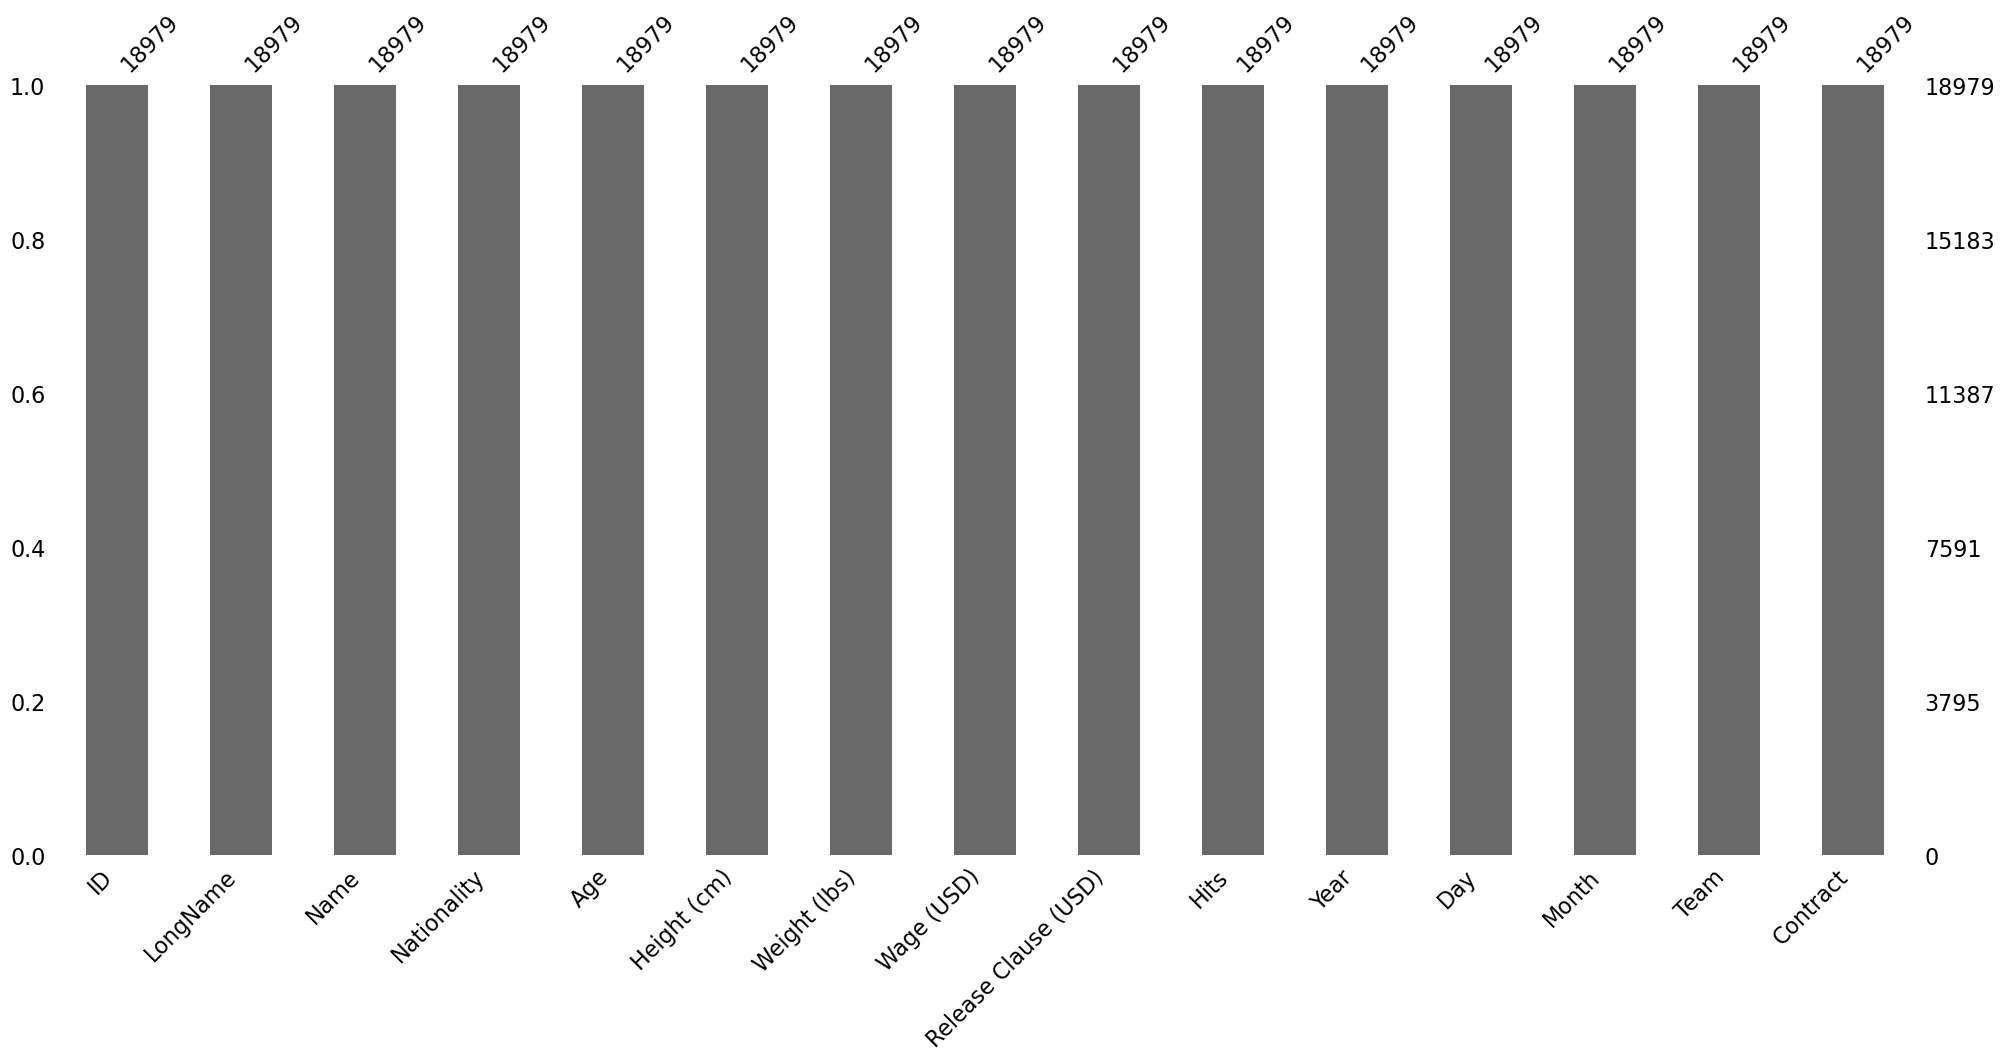

In [45]:
missingno.bar(df_updated)

Observation:
    - It is clear that there is no null values in the dataset

# checking "Duplicated" values

In [46]:
df_updated[df_updated.duplicated()]

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage (USD),Release Clause (USD),Hits,Year,Day,Month,Team,Contract
944,251698,Kevin Berlaso,K. Berlaso,Ecuador,32,173,152,0.0,0.0,12,2010,1,Jan,Ecuador,Free


In [47]:
df_updated[df_updated['LongName'] == "Kevin Berlaso"]

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage (USD),Release Clause (USD),Hits,Year,Day,Month,Team,Contract
899,251698,Kevin Berlaso,K. Berlaso,Ecuador,32,173,152,0.0,0.0,12,2010,1,Jan,Ecuador,Free
944,251698,Kevin Berlaso,K. Berlaso,Ecuador,32,173,152,0.0,0.0,12,2010,1,Jan,Ecuador,Free


In [48]:
df_updated = df_updated.drop_duplicates()

In [49]:
df_updated.shape

(18978, 15)

In [50]:
for col in df_updated.columns:
    print(f"{col} has {df_updated[col].value_counts().count()}")

ID has 18978
LongName has 18851
Name has 17919
Nationality has 164
Age has 29
Height (cm) has 21
Weight (lbs) has 56
Wage (USD) has 141
Release Clause (USD) has 1170
Hits has 408
Year has 20
Day has 31
Month has 12
Team has 714
Contract has 131


Observation:
    - The dataset contains a single duplicated value. However, there are 18,851 and 17,919 unique values in
      the 'LongName' and 'Name' columns, respectively. Let's identify the duplicated value.

In [51]:
df_updated[df_updated[['LongName','Name']].duplicated() == True]

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage (USD),Release Clause (USD),Hits,Year,Day,Month,Team,Contract
1187,215051,Lisandro López,L. López,Argentina,30,188,176,17.4k,9.2M,7,2020,1,Jan,Boca Juniors,2020 ~ 2023
2516,167431,Gonzalo Castro,G. Castro,Germany,33,173,159,21.8k,4.5M,15,2018,1,Jul,VfB Stuttgart,2018 ~ 2021
2562,213017,Ben Davies,B. Davies,England,24,185,163,19.6k,11.2M,38,2013,1,Jan,Preston North End,2013 ~ 2021
2955,232646,Claudio Bravo,C. Bravo,Argentina,23,170,152,10.9k,10.2M,40,2016,4,Jan,Club Atlético Banfield,2016 ~ 2021
4289,252064,Ladislav Krejčí,L. Krejčí,Czech Republic,21,190,190,545.0,8.1M,10,2019,2,Jul,Sparta Praha,2019 ~ 2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18703,241341,Yuan Zhang,Zhang Yuan,China PR,23,183,159,2.2k,88.3k,2,2020,16,Jul,Shenzhen FC,2020 ~ 2023
18741,243202,Alfie Jones,A. Jones,England,19,185,161,545.0,129.7k,3,2019,8,Aug,Crawley Town,2019 ~ 2021
18813,251563,Joe Wright,J. Wright,England,19,185,181,708.5,137.3k,1,2019,1,Jul,Millwall,2019 ~ 2024
18834,255948,Mark Byrne,M. Byrne,Republic of Ireland,19,178,163,545.0,142.8k,1,2020,13,Feb,Sligo Rovers,2020 ~ 2020


In [52]:
df_updated[df_updated['LongName'] == 'Lisandro López']

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage (USD),Release Clause (USD),Hits,Year,Day,Month,Team,Contract
895,142707,Lisandro López,L. López,Argentina,37,175,163,19.6k,5.7M,24,2016,4,Jan,Racing Club,2016 ~ 2021
1187,215051,Lisandro López,L. López,Argentina,30,188,176,17.4k,9.2M,7,2020,1,Jan,Boca Juniors,2020 ~ 2023


In [53]:
df_updated[df_updated['LongName'] == 'Wei Zhang']

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage (USD),Release Clause (USD),Hits,Year,Day,Month,Team,Contract
13349,224602,Wei Zhang,Zhang Wei,China PR,27,175,161,2.2k,548.3k,1,2014,30,Apr,Shanghai SIPG FC,2014 ~ 2020
18909,252332,Wei Zhang,Zhang Wei,China PR,20,185,163,2.2k,86.1k,1,2019,1,Jan,Hebei China Fortune FC,2019 ~ 2024


In [54]:
df_updated[df_updated['LongName'] == 'Mark Byrne']

,ID,LongName,Name,Nationality,Age,Height (cm),Weight (lbs),Wage (USD),Release Clause (USD),Hits,Year,Day,Month,Team,Contract
14388,189828,Mark Byrne,M. Byrne,Republic of Ireland,31,173,168,599.5,371.7k,2,2020,21,Aug,Shelbourne FC,2020 ~ 2020
18834,255948,Mark Byrne,M. Byrne,Republic of Ireland,19,178,163,545.0,142.8k,1,2020,13,Feb,Sligo Rovers,2020 ~ 2020


In [55]:
df_updated['Year'] = df_updated['Year'].astype(int)
df_updated['Day'] = df_updated['Day'].astype(int)

Observation:
    - We can see the same players appearing in the 'LongName','Name' column, likely because these players have 
     changed teams in different years.
    